<a href="https://colab.research.google.com/github/ersmythe/MAT421/blob/main/Module_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction to Linear Algebra
Linear algebra is commonly used in data science and machine learning. It includes concepts such as vector spaces, orthogonality, eigenvalues, matrix decomposition, and is the basis for linear regression, which is very useful for data science.

## 1.2 Elements of Linear Algebra
Linear algebra is made up of V=R^n (R being all real numbers). A linear combination is made by multiplying by constants and adding terms. A linear subspace is a subset closed under scalar multiplication and vector addition. Because it can always be reached by scalar multiplication, 0 is always part of a linear subspace.
Span is the set of all linear combinations that can be made from a set. Every span is a linear subspace. A set of vectors that span subspace U are said to be a spannings set of U.


In [ ]:
# How to set up a linear algebra array
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Column space is the span of the columns in a matrix.
It is good to reduce repetition (and therefore computer space required) for matrices, and this is determined with linear independence.
A set of vectors are linearly independent if none can be written as combinations of the others. Another way to test this is to find the determinant. If the determinant of a matrix is nonzero, the vectors (columns) within that matrix are linearly independent. The opposite of this is linearly dependent.

In [ ]:
# Use determinant to check linear independence
import numpy as np
A = np.array([[1,2,3],[6,5,6],[7,8,9]])
Det = np.linalg.det(A)
print("Determinant of A =", Det)
if Det != 0:
    print("Columns of A are linearly independent")
else:
    print("Columns of A are linearly dependent")

Determinant of A = 12.0
A is linearly independent


A basis of U is a set of vectors within U that span U and are linearly independent. The rank of matrix A is the dimension of the column space of A. Any basis of subspace U has the same number of elements, which is called the dimension of U and written dim(U)

In [ ]:
# Finding the rank of A with Python
import numpy as np
A = np.array([[1, 2, 3], [6, 5, 6], [7, 8, 9]])
print("Rank of A =", np.linalg.matrix_rank(A))

Rank of A = 3


Another useful principle is that for a set of linearly dependent vectors, there exists a vector that is a linear combination of the previous ones, and this can be removed without impacting the span.

**Orthonormality**

It can be desireable to have a set of orthonormal vectors to span a base, because they are each a unit vector in an orthogonal direction. This means that each vector is orthogonal to the others, which can be tested by taking the dot product between each pair of vectors. If the dot product is zero, they are orthogonal. Orthonormal vectors are also one unit long. We can find the norm (length) of a vector by taking the square root of the sum of squares of each component in that vector.

In [ ]:
import numpy as np
A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
dot01 = np.dot(A[0,:],A[1,:])
dot12 = np.dot(A[1,:],A[2,:])
dot02 = np.dot(A[0,:],A[2,:])
print("Dot product of rows 1 and 2 =", dot01)
print("Dot product of rows 2 and 3 =", dot12)
print("Dot product of rows 1 and 3 =", dot02)
if dot01 == 0 and dot12 == 0 and dot02 == 0:
    print("Vectors are orthogonal")
else:
    print("Vectors are not orthogonal")
normA1 = np.linalg.norm(A[0,:])
normA2 = np.linalg.norm(A[1,:])
normA3 = np.linalg.norm(A[2,:])
print("Norm of vector row 1 =", normA1)
print("Norm of vector row 2 =", normA2)
print("Norm of vector row 3 =", normA3)
if dot01 == 0 and dot12 == 0 and dot02 == 0 and normA1 == 1 and normA2 == 1 and normA3 == 1:
    print("Vectors are orthonormal")
else:
    print("Vectors are not orthonormal")


Dot product of rows 1 and 2 = 0
Dot product of rows 2 and 3 = 0
Dot product of rows 1 and 3 = 0
Vectors are orthogonal
Norm of vector row 1 = 1.0
Norm of vector row 2 = 1.0
Norm of vector row 3 = 1.0
Vectors are orthonormal


Best Approximation Theorem

We often have a vector not in subspace U and want to find the closest vector approximation to it that is within U. This is the same as vector projection. Let v be the vector not in U, and let v' be the approximation. Let u1 be the span of subspace U (it's only one dimensional). Then v' = dot(u1,v)*u1. The dot product gives the scalar amount of v that is in the direction of u1, and multiplying by u1 gives the direction back.

More general case: Let U be a linear subspace with orthonormal basis q1,...,qm. The orthogonal projection of v (not part of U) onto U is given by the sum from j=1 to m of dot(v,qj)*qj.

In [ ]:
import numpy as np
q1 = np.array([1,0,0])
q2 = np.array([0,1,0])
v = np.array([3,6,7])
proj = np.dot(v,q1)*q1 + np.dot(v,q2)*q2
print("Projection of v onto U =", proj)


Projection of v onto U = [3 6 0]


Eigenvalues and Eigenvectors

Let A be an nxn matrix. Then lambda is an eigenvalue of A if there is a nonzero vector such that A*x = lambda*x. x is an eigenvector, and corresponds to a certain eigenvalue. Not every matrix A has eigenvalues/vectors. The number of eigenvalues/vectors is always equal to or less than the dimensions of the matrix A.

In [ ]:
import numpy as np
A = np.array([[4, 4, 8],
              [1, 3, 5],
              [4, 6, 8]])
w,v=np.linalg.eig(A)
print("eigenvalues =", w)
print("eigenvectors =", v)


eigenvalues = [14.75419492  1.40421478 -1.1584097 ]
eigenvectors = [[-0.63944074 -0.82362825 -0.46991942]
 [-0.34637942  0.56689853 -0.63018423]
 [-0.68639409 -0.01620401  0.61809673]]


Diagonalization

We often want to diagonalize matrices, that is, change them so that they only have nonzero terms along the diagonal. A matrix can be diagonalized if there is a diagonal matrix D and orthonormal matrix P such that A=PDP'. (' means transpose)

A symmetrical matrix has these properties:


*   n real eigenvalues (including repeated values)
*   The eigenspace for lambda is k-dimensional if lambda is is repeated k times
*   Eigenspaces are orthogonal
*   A is diagonalizable



# 1.3 Linear Regression
A linear regression can be found using the least squares method. This can be solved using QR decomposition, which starts by using the Gram-Schmidt algorithm to define an orthonormal basis.

Let A be a matrix with m linearly independent columns that span a subspace. There exists a matrix Q with m column vectors that make up the orthonormal basis for span(A). The Gram-Schmidt method finds Q using the equation A=QR (hence why it's called QR decomposition). R is an upper-triangular matrix.


The least squares method is used to find a line of best fit for overdetermined systems of equations (when the matrix of data A is taller than it is wide). Using the QR decomposition method, the least squares solution takes the form $Rx=Q^Tb$.

[[1.50995448]
 [0.97441269]]


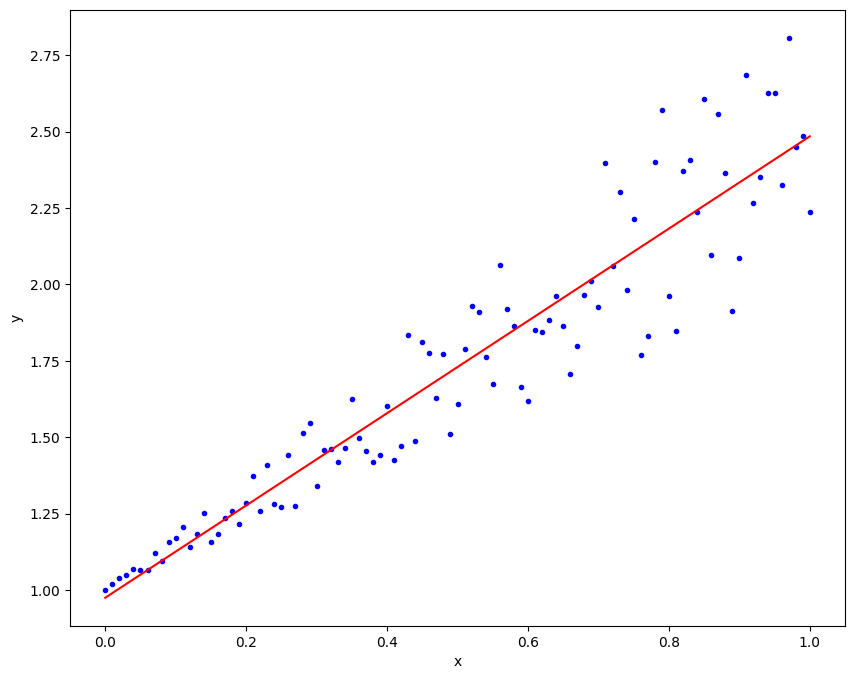

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
y = 1 + x + x*np.random.random(len(x))
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
